In [51]:
import requests
import json
from Resources.API_Key import api_key
import pandas as pd

In [52]:
# Using the API key to access BLS data   
url = "https://api.bls.gov/publicAPI/v2/timeseries/data/"

series_id_lp = "PRS85006092"

payload = {
    "seriesid": [series_id_lp],
    "startyear": "2018",
    "endyear": "2024",
    "registrationkey": api_key
}

response = requests.post(url, json=payload)

if response.status_code == 200:
    data = response.json()
    print(json.dumps(data, indent=4))
else:
    print(f"Error {response.status_code}")
    

{
    "status": "REQUEST_SUCCEEDED",
    "responseTime": 387,
    "message": [],
    "Results": {
        "series": [
            {
                "seriesID": "PRS85006092",
                "data": [
                    {
                        "year": "2024",
                        "period": "Q03",
                        "periodName": "3rd Quarter",
                        "latest": "true",
                        "value": "2.2",
                        "footnotes": [
                            {}
                        ]
                    },
                    {
                        "year": "2024",
                        "period": "Q02",
                        "periodName": "2nd Quarter",
                        "value": "2.1",
                        "footnotes": [
                            {
                                "code": "R",
                                "text": "revised"
                            }
                        ]
                    },
   

In [53]:
# Converting the data into a dataframe
series_data = data['Results']['series'][0]['data']
labor_productivity_df = pd.DataFrame(series_data)

# Formatting the data
quarter_mapping = {
    "Q01": "Q1: Jan 1 - Mar 31",
    "Q02": "Q2: Apr 1 - Jun 30",
    "Q03": "Q3: Jul 1 - Sep 30",
    "Q04": "Q4: Oct 1 - Dec 31"
}

# Extra formatting for the data that came from the API request
labor_productivity_df['quarter'] = labor_productivity_df['period'].map(quarter_mapping)
labor_productivity_df['year'] = pd.to_numeric(labor_productivity_df['year'])
labor_productivity_df['percent_change'] = pd.to_numeric(labor_productivity_df['value'])
labor_productivity_df = labor_productivity_df[['year', 'quarter', 'percent_change']]
labor_productivity_df = labor_productivity_df.sort_values(by=['year', 'quarter']).reset_index(drop=True)

In [54]:
# Reading in the Excel file that was used for this data frame
file_path = "Resources/unit_labor_costs.xlsx"
sheet_name = "BLS Data Series"
unit_labor_costs_df = pd.read_excel(file_path)
unit_labor_costs_df = unit_labor_costs_df.melt(id_vars =["Year"],
                                               var_name="quarter",
                                               value_name="percent_change")

#Formatting the data so that it matches the previous data frame
quarter_mapping2 = {
    "Qtr1": "Q1: Jan 1 - Mar 31",
    "Qtr2": "Q2: Apr 1 - Jun 30",
    "Qtr3": "Q3: Jul 1 - Sep 30",
    "Qtr4": "Q4: Oct 1 - Dec 31"
}
unit_labor_costs_df["quarter"] = unit_labor_costs_df["quarter"].map(quarter_mapping2)
unit_labor_costs_df = unit_labor_costs_df.sort_values(by=["Year", "quarter"]).reset_index(drop=True)
unit_labor_costs_df = unit_labor_costs_df.dropna(subset=["percent_change"])

<Figure size 1000x600 with 0 Axes>

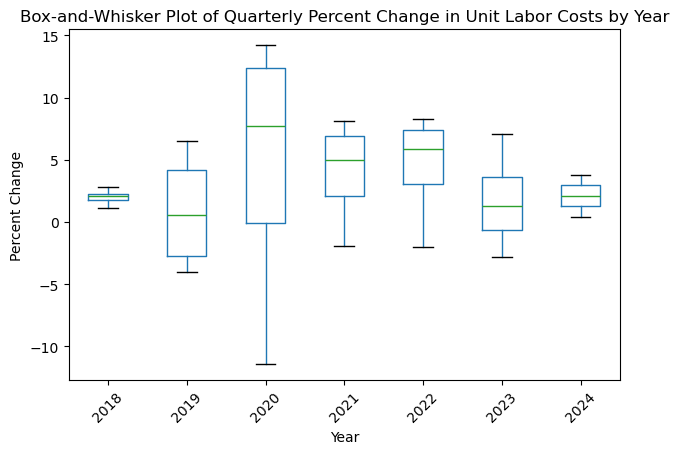

In [64]:
#imports
import numpy as np
import matplotlib.pyplot as plt


# Plotting the box plot for percent change by quarter
plt.figure(figsize=(10, 6))
unit_labor_costs_df.boxplot(column="percent_change", by="Year", grid=False)
plt.title("Box-and-Whisker Plot of Quarterly Percent Change in Unit Labor Costs by Year")
plt.suptitle("") # Removes the default title
plt.xlabel("Year")
plt.ylabel("Percent Change")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

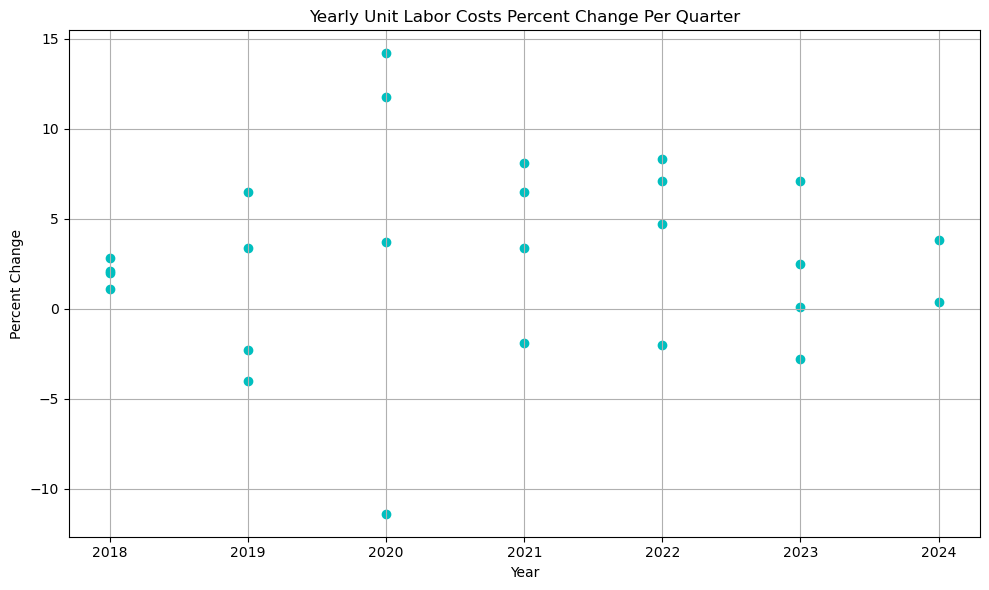

In [ ]:
#imports
import numpy as np
import matplotlib.pyplot as plt

unit_labor_costs_df = unit_labor_costs_df.sort_values(by=["Year","quarter"])

#create scatter plot
plt.figure(figsize=(10,6))
plt.scatter(unit_labor_costs_df["Year"], unit_labor_costs_df["percent_change"], marker ="o", color = "c")

#labels
plt.xlabel("Year")
plt.ylabel("Percent Change")
plt.title("Yearly Unit Labor Costs Percent Change Per Quarter")

#chart layout and design
plt.grid(True)
plt.tight_layout()
plt.show

In [ ]:
# Rinse and repeat for the next excel sheet
file_path2 = "Resources/real_hourly_compensation.xlsx"
sheet_name2 = sheet_name
real_hourly_compensation_df = pd.read_excel(file_path2)
real_hourly_compensation_df = real_hourly_compensation_df.melt(id_vars = ["Year"],
                                                               var_name="quarter",
                                                               value_name="percent_change")

real_hourly_compensation_df["quarter"] = real_hourly_compensation_df["quarter"].map(quarter_mapping2)
real_hourly_compensation_df = real_hourly_compensation_df.sort_values(by=["Year", "quarter"]).reset_index(drop=True)
real_hourly_compensation_df = real_hourly_compensation_df.dropna(subset=["percent_change"])

In [ ]:
file_path3 = "Resources/total_factor_productivity.xlsx"
sheet_name3 = sheet_name
total_factor_productivity_df = pd.read_excel(file_path3)

In [ ]:
# Labor Productivity DataFrame
labor_productivity_df

In [ ]:
# Unit Labor Costs DataFrame
unit_labor_costs_df

In [ ]:
# Real Hourly Compensation Data Frame
real_hourly_compensation_df

In [ ]:
# Total Factor Productivity Data Frame
total_factor_productivity_df

In [5]:
file_path3 = "Resources/labor-productivity-detailed-industries.xlsx"
sheet_name3 = "MachineReadable"
industry_data_df = pd.read_excel(file_path3)
industry_data_df.head()

,Sector,NAICS,Industry,Digit,Basis,Measure,Units,2018,2019,2020,2021,2022,2023
0,Mining,21,Mining,2-Digit,All workers,Labor productivity,% Change from previous year,2.1,7.1,22.2,4.9,-6.9,1
1,Mining,21,Mining,2-Digit,All workers,Real sectoral output,% Change from previous year,12.1,8.5,-6.8,1.2,4.8,5.8
2,Mining,21,Mining,2-Digit,All workers,Hours worked,% Change from previous year,9.7,1.3,-23.7,-3.5,12.6,4.8
3,Mining,21,Mining,2-Digit,All workers,Output per worker,% Change from previous year,3.6,8.2,14.3,8.3,-3.9,0.3
4,Mining,21,Mining,2-Digit,All workers,Unit labor costs,% Change from previous year,-2.2,-3.7,-12.0,-6.1,11.6,4.3


In [8]:
industries_list = industry_data_df["Sector"].unique()
industries_list

array(['Mining', 'Utilities', 'Manufacturing', 'Wholesale Trade',
       'Retail Trade', 'Transportation and Warehousing', 'Information',
       'Finance and Insurance', 'Real Estate and Rental and Leasing',
       'Professional, Scientific, and Technical Services',
       'Administrative and Support and Waste Management and Remediation Services',
       'Health Care and Social Assistance',
       'Arts, Entertainment, and Recreation',
       'Accommodation and Food Services',
       'Other Services (except Public Administration)'], dtype=object)